In [1]:
import torch
import torch.utils.data as data_utils

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
diamonds_data = pd.read_csv('datasets/diamonds.csv', index_col=0)

diamonds_data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [3]:
diamonds_data.shape

(53940, 10)

In [4]:
diamonds_data = diamonds_data.sample(5000, replace=False)

In [5]:
diamonds_data['cut'].value_counts()

Ideal        1997
Premium      1312
Very Good    1113
Good          420
Fair          158
Name: cut, dtype: int64

In [6]:
diamonds_data['color'].value_counts()

G    1092
E     903
F     899
H     729
D     598
I     507
J     272
Name: color, dtype: int64

In [7]:
diamonds_data['clarity'].value_counts()

SI1     1193
VS2     1149
SI2      894
VS1      709
VVS2     488
VVS1     350
IF       158
I1        59
Name: clarity, dtype: int64

In [8]:
diamonds_data.describe()

,carat,depth,table,price,x,y,z
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.804260,61.753280,57.45818,3986.746400,5.745084,5.748518,3.547508
std,0.475693,1.400796,2.20607,4033.225135,1.126794,1.115766,0.697341
min,0.210000,54.000000,49.00000,362.000000,0.000000,0.000000,0.000000
25%,0.400000,61.100000,56.00000,947.000000,4.710000,4.720000,2.920000
50%,0.710000,61.800000,57.00000,2443.000000,5.705000,5.720000,3.530000
75%,1.050000,62.500000,59.00000,5412.750000,6.550000,6.550000,4.040000
max,3.110000,72.200000,70.00000,18784.000000,9.440000,9.380000,5.980000


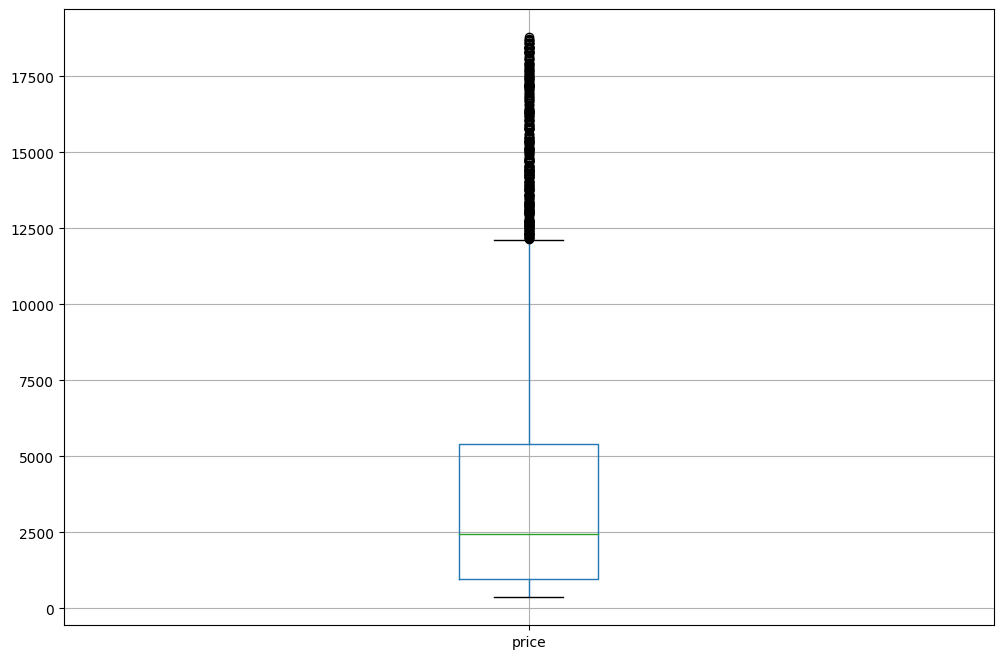

In [9]:
plt.figure(figsize=(12, 8))

diamonds_data.boxplot('price')

plt.show()

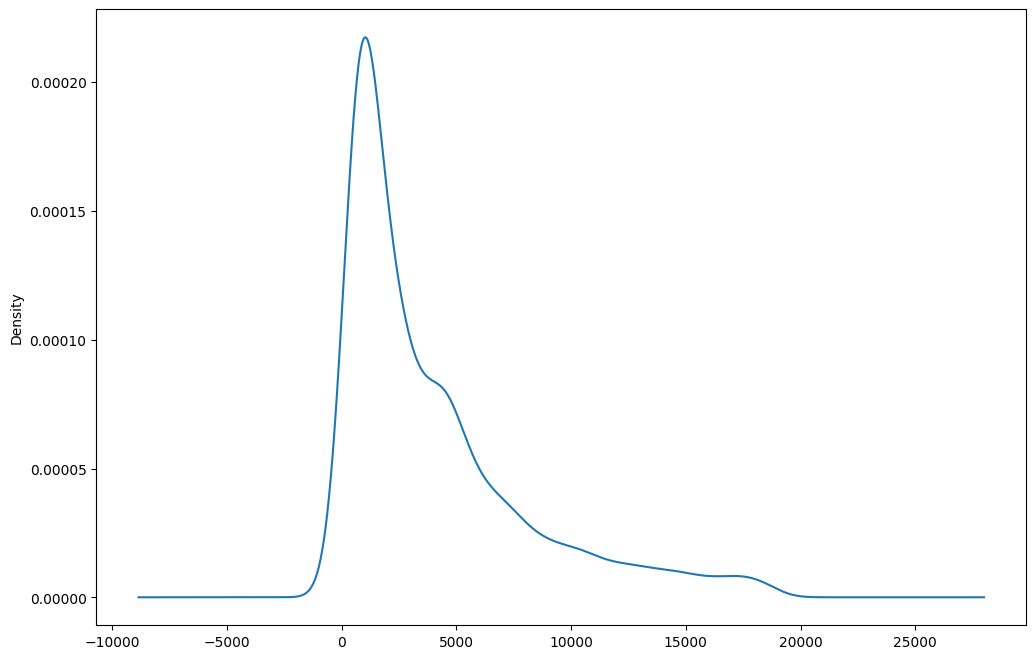

In [10]:
plt.figure(figsize=(12, 8))

diamonds_data['price'].plot.kde()

plt.show()

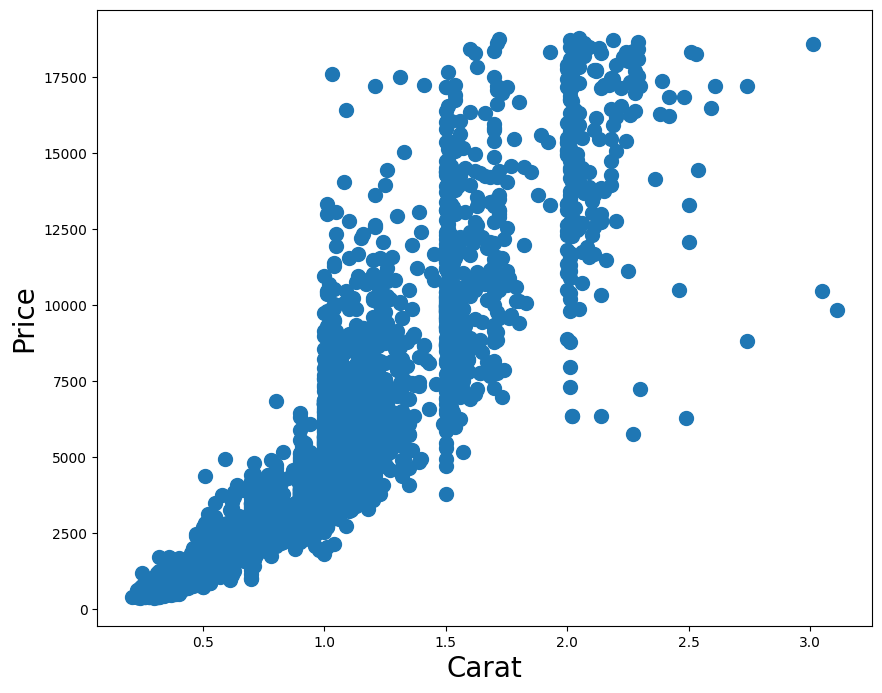

In [11]:
plt.figure(figsize=(10, 8))

plt.scatter(diamonds_data['carat'], diamonds_data['price'], s=100)

plt.xlabel('Carat', fontsize=20)
plt.ylabel('Price', fontsize=20)

plt.show()

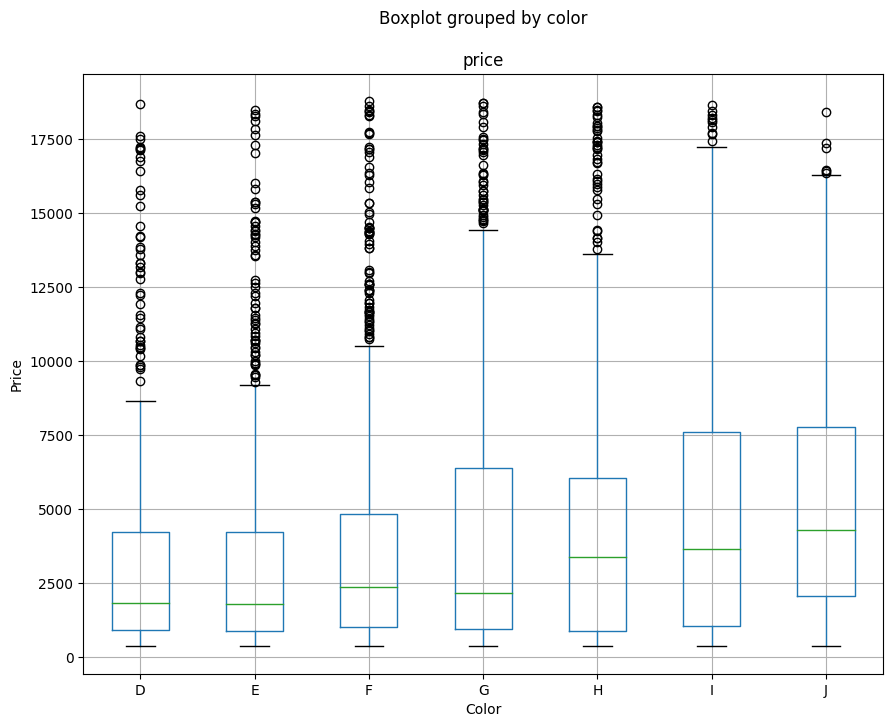

In [12]:
diamonds_data.boxplot('price', 'color', figsize=(10, 8))

plt.xlabel('Color')
plt.ylabel('Price')

plt.show()

In [13]:
diamonds_data_corr = diamonds_data.corr()

diamonds_data_corr

C:\Users\natha\AppData\Local\Temp\ipykernel_19064\710583191.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  diamonds_data_corr = diamonds_data.corr()


,carat,depth,table,price,x,y,z
carat,1.000000,0.029062,0.176360,0.920988,0.968701,0.970100,0.964706
depth,0.029062,1.000000,-0.296301,-0.005840,-0.027154,-0.030825,0.091333
table,0.176360,-0.296301,1.000000,0.120765,0.189866,0.184211,0.149463
price,0.920988,-0.005840,0.120765,1.000000,0.877156,0.880601,0.871162
x,0.968701,-0.027154,0.189866,0.877156,1.000000,0.994328,0.988243
y,0.970100,-0.030825,0.184211,0.880601,0.994328,1.000000,0.984539
z,0.964706,0.091333,0.149463,0.871162,0.988243,0.984539,1.000000
